In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
final_df = pd.read_csv('final.csv')
out_of_sample = pd.read_csv('Out_of_Sample.csv')
out_of_sample = out_of_sample.drop(['Visitor-Points', 'Home-Points'], 1)
final_df = final_df.drop(['Visitor-Points', 'Home-Points'], 1)

In [3]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [4]:
X = final_df.drop(['score_gap_sign'], axis = 1)
y = final_df['score_gap_sign']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 66)

In [5]:
lassoreg = linear_model.Lasso(alpha=1)
lassoreg.fit(X_train, y_train)
pred = lassoreg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, pred))
print(error)

11.675835166362408


In [6]:
# out-of-sample prediction
X_out = out_of_sample.drop(['score_gap_sign'], axis = 1)
y_out = out_of_sample['score_gap_sign']
lassoreg.fit(X,y)
pred = lassoreg.predict(X_out)
error = np.sqrt(mean_squared_error(y_out, pred))
print(pred)
print(error)

[ 1.96585181  5.13591976 -1.5537923   2.65708919  2.26987952  7.4281537
 -1.09951493  0.64437457 -3.50360474 -0.93724605 -5.14610524  2.18543151
  1.23799412  6.42537838  3.63866099 -0.20548532  1.18760754  0.02814541
  0.11178111  0.18843944 -1.26193188  6.06969734 -3.18798825  0.45118402
 -2.71807023 -2.72032173 -3.67873117  8.77671155  5.68816894 -5.39494182
  0.70794927 -6.59658263  7.28158696  1.04405852 -3.67597855  5.77631018
 -2.81122432 -2.64787324  3.87130101  7.75800768  0.92216158 12.54736597
 -2.68127715  6.05317943 -0.84697988  2.94799886  4.6771249   7.12829457
  5.68878601 -2.05651625  2.4226995   1.1730963  -2.32536268  4.70583811
  7.48273859  1.83070503  4.24375627  0.51501633 -4.32078495  2.41221101
  0.14355453  3.7630936  -1.30642031 -2.85511524 -1.8090175  -5.74828548
  3.79154058  3.15066001 -1.47040091  6.20376091 -9.75023388 -0.45431122
  8.09871448  0.59881965 -0.45442439 -3.21432883  2.85864674 -1.13320954
  7.00453788  0.32537283  3.62898278  3.39044479 -8.

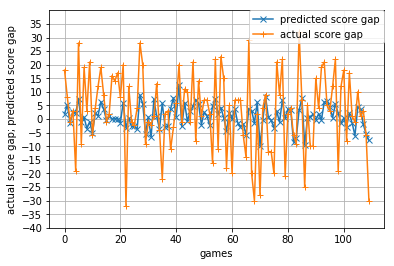

In [7]:
# Visulization of prediction 
pred_list = list(pred)
y_out_list = list(y_out)
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('actual score gap; predicted score gap')
yticks = range(-40,40,5)
ax.set_yticks(yticks)
ax.set_ylim([-40,40])
x = list(range(len(out_of_sample)))
plt.plot(x,pred_list,"x-",label="predicted score gap")
plt.plot(x,y_out_list,"+-",label="actual score gap")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)

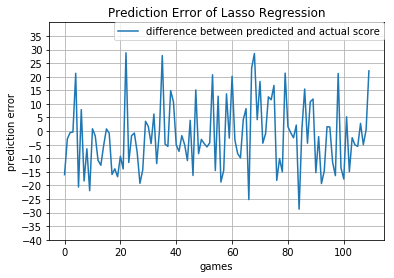

In [8]:
# Visulization of prediction 
import matplotlib.pyplot as plt
pred_list = list(pred)
y_out_list = list(y_out)
pred_actual_diff = [pred[i] - y_out[i] for i in range(len(pred))]
pred_actual_diff = [float(x) for x in pred_actual_diff]
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('prediction error')
yticks = range(-40,40,5)
ax.set_yticks(yticks)
ax.set_ylim([-40,40])
x = list(range(len(out_of_sample)))
plt.plot(x, pred_actual_diff, label="difference between predicted and actual score")
plt.title("Prediction Error of Lasso Regression")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)